# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,False,False,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,False,False,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,False,False,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,False,False,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


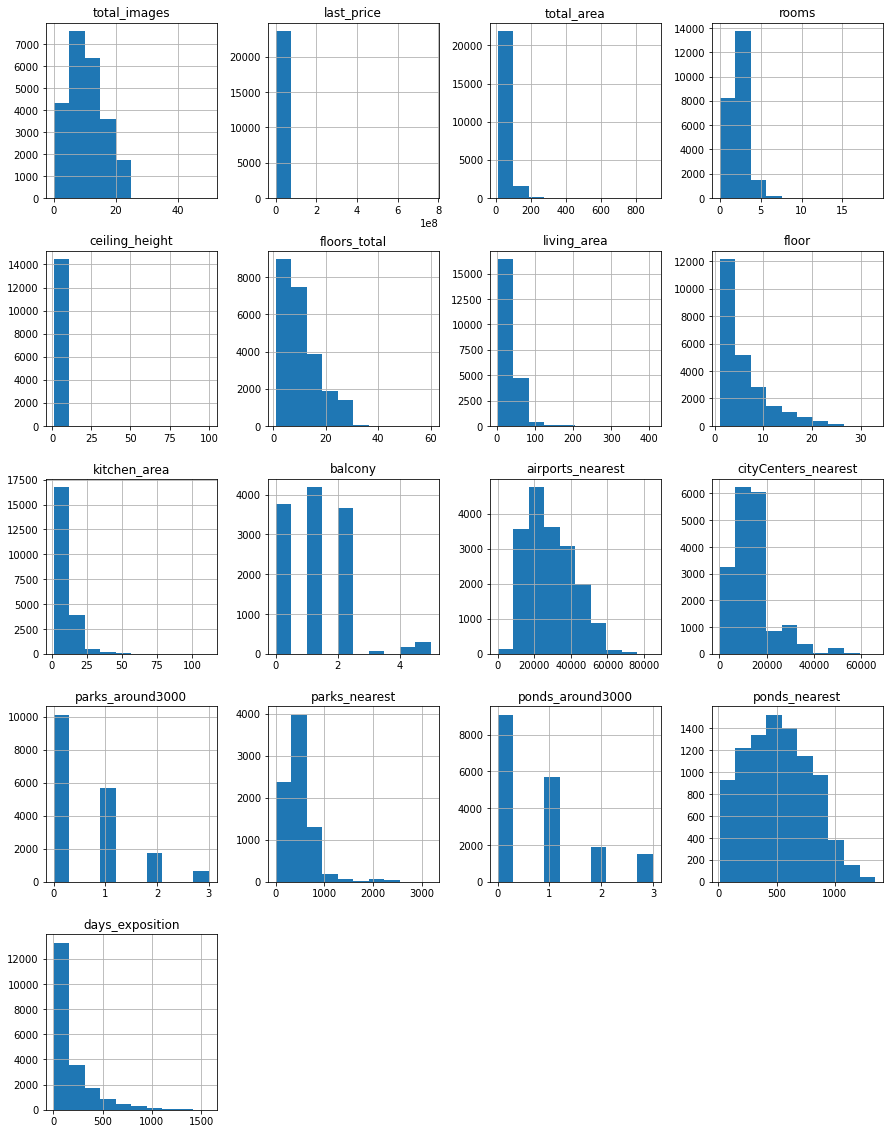

In [6]:
data.hist(figsize=(15, 20));

In [7]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


    При первом ознакомлении с данными было выявлено что большенство столбцов имеет пропуски. Столбец `balcony` имеет не верный тип данных `float` вместо `int`. С столбец `first_day_exposition` имеет тип `object` и требует перевод в формат даты `datetime64`. Встречаются значения для высоты потолка `ceiling_height`, `living_area`, `kitchen_area` выходящие за рамки возможных значений. 

### Предобработка данных

#### Найдите и изучите пропущенные значения в столбцах:

Таблица ниже перечисляет название столбцов с пропусками и долей пропуков. 

In [8]:
(data.isna().mean()).loc[(data.isna().sum()!=0)]

ceiling_height         0.387991
floors_total           0.003629
living_area            0.080299
is_apartment           0.882906
kitchen_area           0.096122
balcony                0.486054
locality_name          0.002068
airports_nearest       0.233850
cityCenters_nearest    0.232879
parks_around3000       0.232837
parks_nearest          0.659100
ponds_around3000       0.232837
ponds_nearest          0.615596
days_exposition        0.134225
dtype: float64

Если число балконов не указано то скорее всего их нет - заменяем пропуски на ноль. 

In [9]:
data['balcony']=data['balcony'].fillna(0)
data['balcony'].isna().sum()

0

Можно предположить, что пропуски в столбце `'is_apartment'` указывают на то что данный объект не является апартаментом. Т.е. пропуск можно заменить на `False`.

In [10]:
data['is_apartment']=data['is_apartment'].fillna(False)
data['is_apartment'].isna().sum()

0

Все пропуски в `parks_nearest` и `ponds_nearest` имеют нулевое либо `nan` значение в столбцах `parks_around3000` и `ponds_around3000` соответсвенно. 

In [11]:
data[data['parks_nearest'].isna()]['parks_around3000'].unique()

array([ 0., nan])

In [12]:
data[data['ponds_nearest'].isna()]['ponds_around3000'].unique()

array([ 0., nan])

Поэтому пропуски в `parks_nearest` и `ponds_nearest` можно заменить на ноль  

In [13]:
data['parks_nearest']=data['parks_nearest'].fillna(0)
data['ponds_nearest']=data['ponds_nearest'].fillna(0)
data['parks_nearest'].isna().sum()+data['ponds_nearest'].isna().sum()

0

Заменяем пропуски в столбцах `parks_around3000` и `ponds_around3000` на ноль.

In [14]:
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].fillna(0)

Название столбцов где остались пропуски перечислины ниже. Нам не удалось определить разумную замену для пропусков. 

In [15]:
(data.isna().mean()).loc[(data.isna().sum()!=0)]

ceiling_height         0.387991
floors_total           0.003629
living_area            0.080299
kitchen_area           0.096122
locality_name          0.002068
airports_nearest       0.233850
cityCenters_nearest    0.232879
days_exposition        0.134225
dtype: float64

#### Рассмотрите типы данных в каждом столбце:

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Пропуски в `ceiling_height` заменяем на медианные значения:

In [17]:
data.loc[data['ceiling_height'].isna(),'ceiling_height']=data['ceiling_height'].median()
data['ceiling_height'].median()

2.65

Тип `first_day_exposition` должен быть заменен на 'datetime'

In [18]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')   

Значение количества балконов и этажей в доме должно быть целочисленым - заменяем тип `float64`  на целочисленный `int`. 

In [19]:
data['balcony']=data['balcony'].astype('int')
data['floors_total']=data['floors_total'].astype('Int64')

#### Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. 

In [20]:
print('Количесво уникальные наименований равно: ', len(data['locality_name'].unique()))

Количесво уникальные наименований равно:  365


В написание наименования населенного пункта используется как посёлок так и поселок.

In [21]:
data['locality_name']=data['locality_name'].str.replace('ё', 'е', regex=True)

Также некоторые наименования входят как городской поселок, коттеджный поселок, поселок, село, деревня.

In [22]:
data['locality_name']=data['locality_name'].str.replace('поселок городского типа','поселок', regex=True)
data['locality_name']=data['locality_name'].str.replace('городской поселок|коттеджный поселок','поселок', regex=True) 
data['locality_name']=data['locality_name'].str.replace('поселок |село |деревня ','', regex=True)

In [23]:
print('Количесво уникальные наименований равно: ', len(data['locality_name'].unique()))

Количесво уникальные наименований равно:  311


#### Найдите и устраните редкие и выбивающиеся значения. 

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  Int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

In [25]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 19])

<AxesSubplot:>

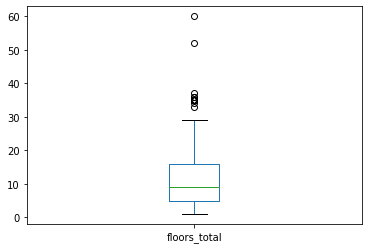

In [26]:
data['floors_total'].plot(kind='box')

<AxesSubplot:>

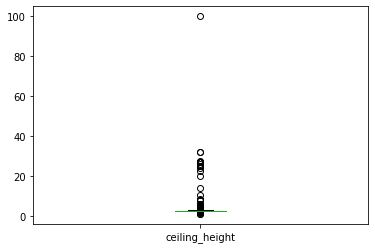

In [27]:
data['ceiling_height'].plot(kind='box')#,ylim=(0,200)

Сначала мы убераем строку с высотой потолков 100 метром. 
Затем все значения высот потол которые выше 24 м мы делим на 10 в предположении что при записи была упущина точка
На последнем шаге бы оставляем толко те объекты высота полков которых лежит в интервале от 2.2 м до 5 метром

In [28]:
data_old=data.copy()

In [29]:
data=data.query('ceiling_height<50')
data.loc[data['ceiling_height']>24,'ceiling_height']=data.loc[data['ceiling_height']>24,'ceiling_height']/10
data=data.query('2.2<ceiling_height<5')

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [30]:
1-data.shape[0]/data_old.shape[0]

0.001392463817038725

Пропуски в высоте были заменены на медианное значение после первого комментария выше. Дублирую код здесь для удобства. 

In [31]:
data.loc[data['ceiling_height'].isna(),'ceiling_height']=data['ceiling_height'].median()
data['ceiling_height'].median()

2.65

<AxesSubplot:>

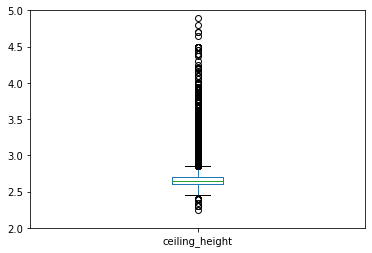

In [32]:
data['ceiling_height'].plot(kind='box',ylim=(2,5))

In [33]:
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,False,False,11.0,2,Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14,NaN,9,False,False,False,NaN,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Мы убираем из данных квартиры в которых выполнено одно из условий

- общая площадь меньше суммы жилой площади и площади кухни
- площадь кухни меньше 3 
- жилая площадь меньше 6
- общий площадь более 200 

In [34]:
data_old=data.copy()

In [35]:
data=data[~((data['kitchen_area']<3) 
     |(data['living_area']<6) 
     |(data['kitchen_area']+data['living_area']>data['total_area'])
     |(data['total_area']>200)
      )]

Доля удаленных записей состaвляет:

In [36]:
1-data.shape[0]/data_old.shape[0]

0.012887686977097967

Мы удаляем строку с крайне низкой стоимостью квартиры за кв. м.

In [37]:
data.query('last_price<200000').sort_values(by='last_price')  #[['last_price','year']]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25,32.0,25,False,False,False,40.5,0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,0.0,8.0


In [38]:
data=data.query('last_price>=200000')

In [39]:
1-data.shape[0]/data_old.shape[0]

0.012929941688498259

In [40]:
data[['last_price','rooms','total_area']].describe()

,last_price,rooms,total_area
count,2.336000e+04,23360.000000,23360.000000
mean,6.023988e+06,2.036558,58.220751
std,6.189745e+06,0.996049,26.526241
min,4.300000e+05,0.000000,12.000000
25%,3.400000e+06,1.000000,40.000000
50%,4.600000e+06,2.000000,52.000000
75%,6.700000e+06,3.000000,69.000000
max,3.300000e+08,11.000000,200.000000


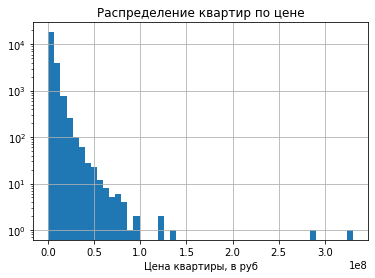

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [41]:
data['last_price'].hist(bins=50)
plt.yscale('log')
plt.xlabel('Цена квартиры, в руб')
plt.title('Распределение квартир по цене')
plt.show()
data[data['last_price']>5*10**8] #['last_price']

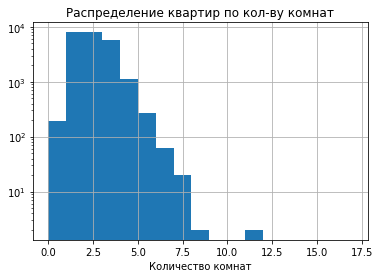

Доля квартир с более чем 12 комнатами 0.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [42]:
data['rooms'].hist(bins=17, range=(0,17))
plt.yscale('log')
plt.xlabel('Количество комнат')
plt.title('Распределение квартир по кол-ву комнат')
plt.show()
print('Доля квартир с более чем 12 комнатами', data[data['rooms']>12].shape[0]/data.shape[0])
data[data['rooms']>12]

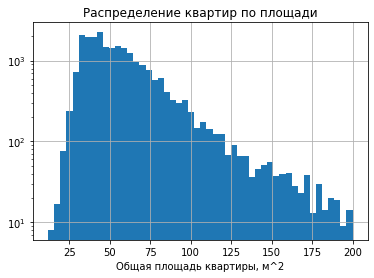

Доля квартир с площадью более чем 550 м^2 равна 0.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [43]:
data['total_area'].hist(bins=50)
plt.yscale('log')
plt.xlabel('Общая площадь квартиры, м^2')
plt.title('Распределение квартир по площади')
plt.show()
print('Доля квартир с площадью более чем 550 м^2 равна', data[data['total_area']>550].shape[0]/data.shape[0])
data[data['total_area']>550]

**Вывод предобработки данных**

В предобработке данных были обнаружены следущее аномалии

- пропуски. часть из пропусков были заменены на нулевое значение в предположении что отсутвие данных укавает на нулевое значение параметра. Это было применено к следующем столбцам: `balcony`, `parks_nearest`, `ponds_nearest`, `parks_around3000` и `ponds_around3000` 

- не корректный формат данных: величина кол-ва балконов задавалась типом float64.

- дубликаты. Наименования населенных пунктов упоминаются как городской поселок, коттеджный поселок, поселок, село, деревня. Типы населенных пунктов были удалены из наименований для избежания дублирования. 

- *в столбцах со стоимостью квартиры, количеством комнат и общей площадью есть сильно высокие значения. Так максимальная площадь квартиры в данных 900 м$^2$, количество комнат достигает 19, а стоимость самой дорогой квартиры 763 миллиона рублей, что почти дважды выше чем квартира идущая следущей по стоимости.*

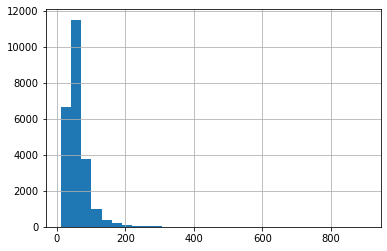

In [44]:
#код ревьюера
data2 = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
(data2['total_area']).hist(bins=30);


In [45]:
data.query('total_area>200').shape[0]

0

### Посчитайте и добавьте в таблицу новые столбцы

In [46]:
data['price']=data['last_price']/data['total_area']

In [47]:
data['day_of_week']=pd.DatetimeIndex(data['first_day_exposition']).dayofweek
data['month']=pd.DatetimeIndex(data['first_day_exposition']).month
data['year']=pd.DatetimeIndex(data['first_day_exposition']).year

Добaвляем колонку `'type_of_floor'` с типом этажа: «первый», «последний», «другой»

In [48]:
data['type_of_floor']='другой'
data.loc[(data['floor']==data['floors_total']),'type_of_floor']='последний'
data.loc[data['floor']==1,'type_of_floor']='первый'

Добaвляем колонку `'distance_to_cityCenters'` с растоянием в км до центра округленным до целых значений.

In [49]:
data['distance_to_cityCenters']=(data['cityCenters_nearest']/1000).round().astype('Int64')

### Проведите исследовательский анализ данных

#### Изучение параметров объектов

In [50]:
data[
    ['total_area','living_area','kitchen_area',
    'price','rooms','ceiling_height','floor']
    ].describe()

,total_area,living_area,kitchen_area,price,rooms,ceiling_height,floor
count,23360.000000,21489.000000,21120.000000,2.336000e+04,23360.000000,23360.000000,23360.000000
mean,58.220751,33.244097,10.377569,9.837250e+04,2.036558,2.692210,5.894392
std,26.526241,17.345927,5.350578,4.540084e+04,0.996049,0.205427,4.888738
min,12.000000,6.000000,3.000000,7.962963e+03,0.000000,2.250000,1.000000
25%,40.000000,18.600000,7.000000,7.649781e+04,1.000000,2.600000,2.000000
50%,52.000000,30.000000,9.000000,9.482759e+04,2.000000,2.650000,4.000000
75%,69.000000,42.000000,11.985000,1.138394e+05,3.000000,2.700000,8.000000
max,200.000000,164.700000,93.200000,1.736842e+06,11.000000,4.800000,33.000000


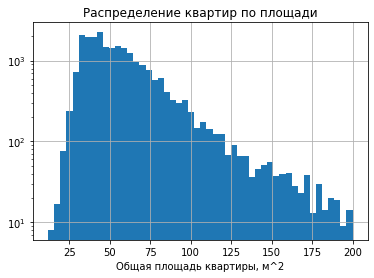

In [51]:
data['total_area'].hist(bins=50)
plt.yscale('log')
plt.xlabel('Общая площадь квартиры, м^2')
plt.title('Распределение квартир по площади')
plt.show()

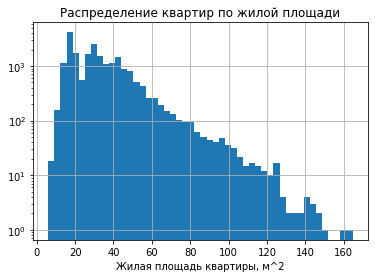

In [52]:
data['living_area'].hist(bins=50)
plt.yscale('log')
plt.xlabel('Жилая площадь квартиры, м^2')
plt.title('Распределение квартир по жилой площади')
plt.show()

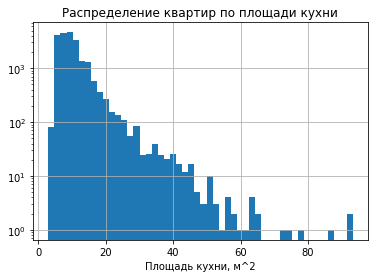

In [53]:
data['kitchen_area'].hist(bins=50)
plt.yscale('log')
plt.xlabel('Площадь кухни, м^2')
plt.title('Распределение квартир по площади кухни')
plt.show()

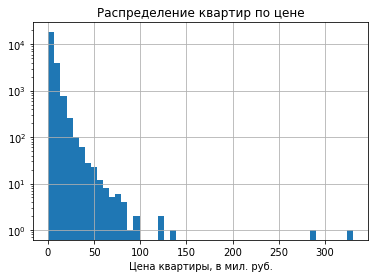

In [54]:
(data['last_price']/10**6).hist(bins=50)
plt.yscale('log')
plt.xlabel('Цена квартиры, в мил. руб.')
plt.title('Распределение квартир по цене')
plt.show()

In [55]:
data['rooms'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 11])

In [56]:
#.plot(x='b', y='a', style='o-', xlim=(0, 3), ylim=(0,1), grid=True, figsize=(10, 3))    

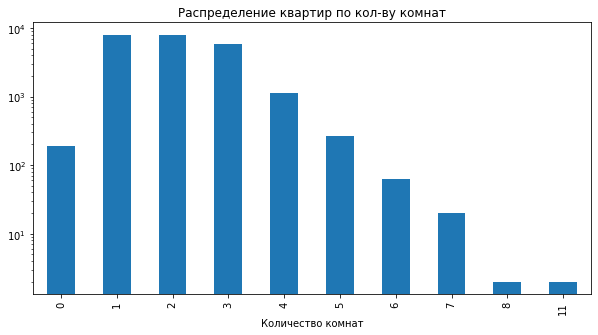

In [57]:
data.groupby('rooms')['last_price'].count().plot(
    kind='bar',figsize=(10,5))
plt.yscale('log')
plt.xlabel('Количество комнат')
plt.title('Распределение квартир по кол-ву комнат')
plt.show()

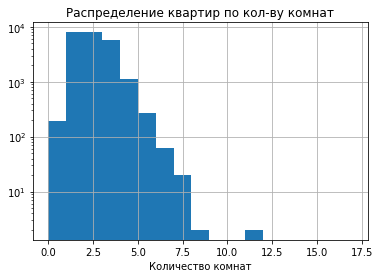

In [58]:
data['rooms'].hist(bins=17, range=(0,17))
plt.yscale('log')
plt.xlabel('Количество комнат')
plt.title('Распределение квартир по кол-ву комнат')
plt.show()

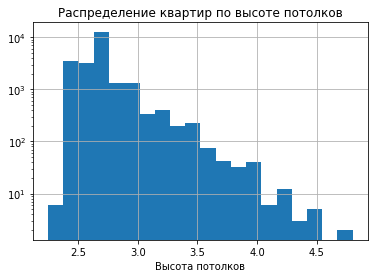

In [59]:
data['ceiling_height'].hist(bins=20)
plt.yscale('log')
plt.xlabel('Высота потолков')
plt.title('Распределение квартир по высоте потолков')
plt.show()

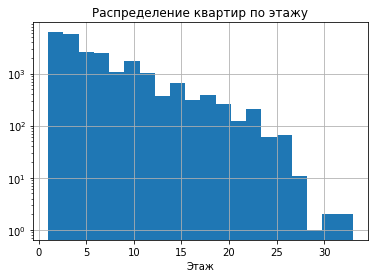

In [60]:
data['floor'].hist(bins=20)
plt.yscale('log')
plt.xlabel('Этаж')
plt.title('Распределение квартир по этажу')
plt.show()

- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.
- Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.

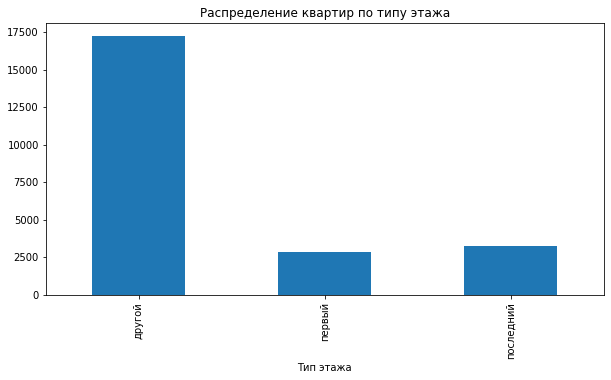

In [61]:
data.groupby('type_of_floor')['last_price'].count().plot(
    kind='bar',figsize=(10,5))
plt.xlabel('Тип этажа')
plt.title('Распределение квартир по типу этажа')
plt.show()

Доля типов этажей

In [62]:
data.groupby('type_of_floor')['last_price'].count()/(data.groupby('type_of_floor')['last_price'].count().sum())

type_of_floor
другой       0.737800
первый       0.123716
последний    0.138485
Name: last_price, dtype: float64

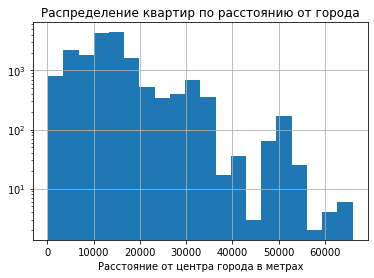

In [63]:
data['cityCenters_nearest'].hist(bins=20)
plt.yscale('log')
plt.xlabel('Расстояние от центра города в метрах')
plt.title('Распределение квартир по расстоянию от города')
plt.show()

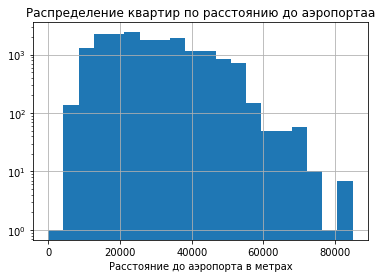

In [64]:
data['airports_nearest'].hist(bins=20)
plt.yscale('log')
plt.xlabel('Расстояние до аэропорта в метрах')
plt.title('Распределение квартир по расстоянию до аэропортаа')
plt.show()

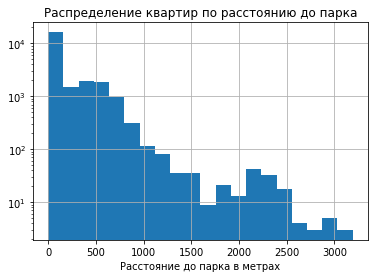

In [65]:
data['parks_nearest'].hist(bins=20)
plt.yscale('log')
plt.xlabel('Расстояние до парка в метрах')
plt.title('Распределение квартир по расстоянию до парка')
plt.show()

In [66]:
[(data['ponds_nearest']==0).mean(),
(data['parks_nearest']==0).mean()]

[0.6184503424657535, 0.662029109589041]

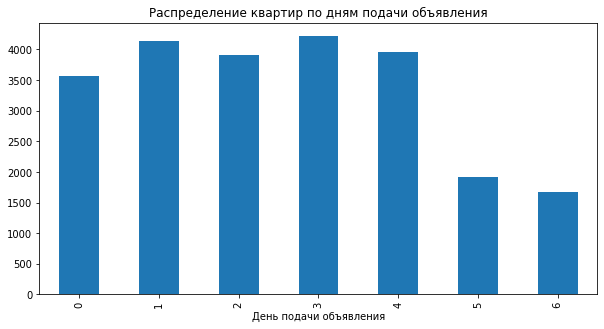

In [67]:
data.groupby('day_of_week')['last_price'].count().plot(
    kind='bar',figsize=(10,5))
plt.xlabel('День подачи объявления')
plt.title('Распределение квартир по дням подачи объявления')
plt.show()

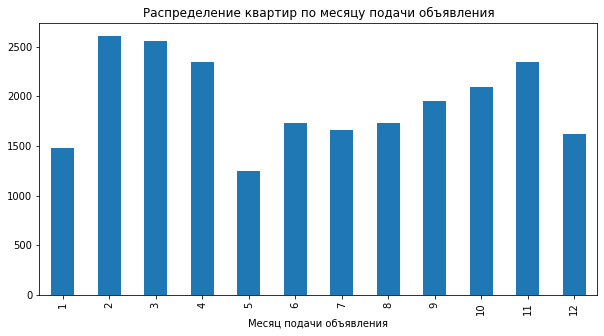

In [68]:
data.groupby('month')['last_price'].count().plot(
    kind='bar',figsize=(10,5))
plt.xlabel('Месяц подачи объявления')
plt.title('Распределение квартир по месяцу подачи объявления')
plt.show()

In [69]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price', 'day_of_week', 'month',
       'year', 'type_of_floor', 'distance_to_cityCenters'],
      dtype='object')

In [70]:
data[
    ['ponds_nearest','cityCenters_nearest','parks_nearest']
    ].describe()

,ponds_nearest,cityCenters_nearest,parks_nearest
count,23360.000000,17879.000000,23360.000000
mean,198.462928,14284.439007,166.280651
std,305.270230,8600.770842,306.414112
min,0.000000,181.000000,0.000000
25%,0.000000,9425.500000,0.000000
50%,0.000000,13149.000000,0.000000
75%,386.000000,16333.000000,295.000000
max,1344.000000,65968.000000,3190.000000


In [71]:
data[
    ['total_area','living_area','kitchen_area',
    'last_price','rooms','ceiling_height','floor','floors_total']
    ].describe()

,total_area,living_area,kitchen_area,last_price,rooms,ceiling_height,floor,floors_total
count,23360.000000,21489.000000,21120.000000,2.336000e+04,23360.000000,23360.000000,23360.000000,23275.000000
mean,58.220751,33.244097,10.377569,6.023988e+06,2.036558,2.692210,5.894392,10.708228
std,26.526241,17.345927,5.350578,6.189745e+06,0.996049,0.205427,4.888738,6.598529
min,12.000000,6.000000,3.000000,4.300000e+05,0.000000,2.250000,1.000000,1.000000
25%,40.000000,18.600000,7.000000,3.400000e+06,1.000000,2.600000,2.000000,5.000000
50%,52.000000,30.000000,9.000000,4.600000e+06,2.000000,2.650000,4.000000,9.000000
75%,69.000000,42.000000,11.985000,6.700000e+06,3.000000,2.700000,8.000000,16.000000
max,200.000000,164.700000,93.200000,3.300000e+08,11.000000,4.800000,33.000000,60.000000


**Вывод**

- общая площадь лежит в интервале от 12 до 200 $м^2$. Медианное значение 52 $м^2$. Нижнее значение было задано в предобработке данных, что бы исключить не корректные данные в которых общая площадь меньше суммы площадей кухни и жилой площади. 
- жилая площадь  лежит в интервале от 6 до 167.7 $м^2$. Медианное значение прим 30 $м^2$. Нижнее значение было задано в предобработке данных, что бы исключить не корректные данные. 
- площадь кухни лежит в интервале от 3 до 93 $м^2$. медианное значение 9 $м^2$. Нижнее значение было задано в предобработке данных, что бы исключить не корректные данные. 
- цена объекта  лежит в интервале от 0.43 до 330 милл.рублей. Медианное значение 4.6 миллиона рублей.
- количество комнат лежит в интервале от 0 до 11 комнат. Медианное значение 2 комнаты. 
- высота потолков лежит в интервале от 2.25  до 4.8 м. Медианное значение 2.65 м. Границы интервала были выбраны в ручную чтобы исключить возможно ошибочные  данные.
- этаж квартиры лежит в интервале от 1 до 33 . Медианное значение 4.
- Доля квартир по типу этажа
    * другой       0.730769
    * первый       0.124434
    * последний    0.144796
- общее количество этажей в доме лежит в интервале от 1 до 60 . Медианное значение 9.
- расстояние до центра города в метрах лежит в интервале от 181 метра до 66 км. Медианное значение 13 км.
- 63% квартир находятся в непосредсвенной близости к парку. 75% квартир находятся к парку ближе чем 338 метра. Максимальное удоление от парка 3.19 км. 
- в рабочии дни публикуют прим. в два раза больше объявлений чем в выходные
- В декабре, январе, мае и июле выкладывается меньше всего объявлений. Больше всего объявление с ферваля по апрель и в ноябре. В мае происходит обвал и затем число растет от месяца к месяцу до ноября.

#### Изучение длительности продажи квартиры

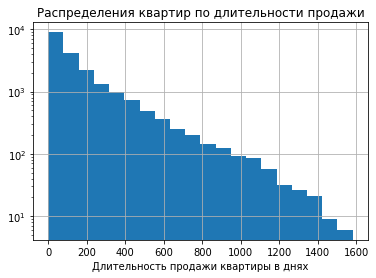

In [72]:
data['days_exposition'].hist(bins=20)
plt.yscale('log')
plt.xlabel('Длительность продажи квартиры в днях')
plt.title('Распределения квартир по длительности продажи')
plt.show()

In [73]:
data['days_exposition'].describe()

count    20245.000000
mean       179.902741
std        218.526375
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

Половина квартир продается в течении 95 дней, что соответсвует медианному значению. Средняя длительность продажи 181 дня. Быстрой продажей можно считать если квартира была продана раньше чем 45 дней после объявления - за столько дней продается четверь все квартир

#### Определение факторов влияющих на стоимость

##### Зависимость от площади

In [74]:
data[['last_price','total_area']].corr()

,last_price,total_area
last_price,1.000000,0.660543
total_area,0.660543,1.000000


<AxesSubplot:xlabel='total_area'>

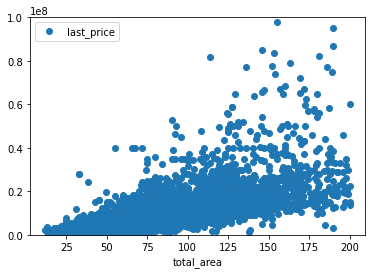

In [75]:
data.plot(y='last_price', x='total_area', style='o', ylim=(0, 10**8)) #, ylim=(0,1), grid=True, figsize=(10, 3))

In [76]:
data['area_bin'] = pd.qcut(data['total_area'],10)

In [77]:
data.groupby('area_bin')['last_price'].agg(['count','median'])

,count,median
area_bin,,
"(11.999, 33.0]",2524,2990000.0
"(33.0, 37.5]",2170,3500000.0
"(37.5, 42.0]",2401,3900000.0
"(42.0, 45.8]",2256,3950000.0
"(45.8, 52.0]",2531,4400000.0
"(52.0, 58.0]",2340,4900000.0
"(58.0, 64.0]",2154,5200000.0
"(64.0, 74.0]",2374,6450000.0
"(74.0, 91.0]",2284,7799999.5


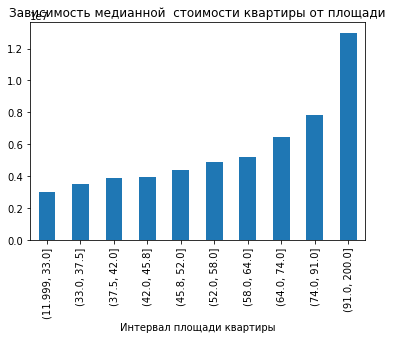

In [78]:
data.groupby('area_bin')['last_price'].median().plot(kind='bar')
plt.xlabel('Интервал площади квартиры')
plt.title('Зависимость медианной  стоимости квартиры от площади')
plt.show()

Цена сильно зависит от площади квартиры. На зависимоть указвает и корреляция данных и ярко демонстрируется зависимостью медианной цены при разбиновке площади. 

##### Зависимость от жилой прощади

In [79]:
column_to_test='living_area'
data[['last_price',column_to_test]].corr()

,last_price,living_area
last_price,1.000000,0.543364
living_area,0.543364,1.000000


<AxesSubplot:xlabel='living_area'>

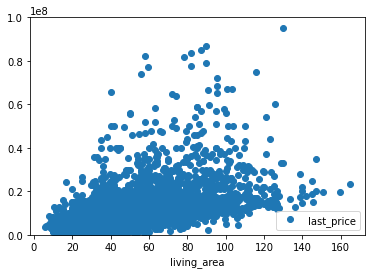

In [80]:
data.plot(y='last_price', x=column_to_test, style='o', ylim=(0, 10**8)) #, ylim=(0,1), grid=True, figsize=(10, 3))

In [81]:
data['area_bin'] = pd.qcut(data[column_to_test],8)

In [82]:
data.groupby('area_bin')['last_price'].agg(['count','median'])

,count,median
area_bin,,
"(5.999, 17.0]",3200,3400000.0
"(17.0, 18.6]",2255,3400000.0
"(18.6, 26.7]",2611,4100000.0
"(26.7, 30.0]",2915,4100000.0
"(30.0, 34.5]",2456,5000000.0
"(34.5, 42.0]",2752,5600000.0
"(42.0, 50.28]",2615,6100000.0
"(50.28, 164.7]",2685,10900000.0


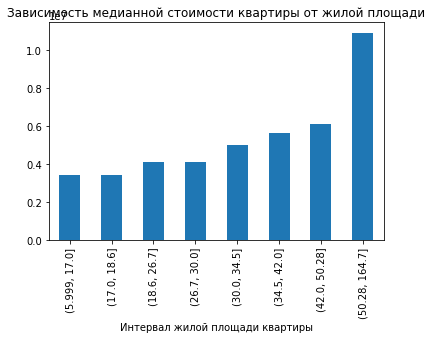

In [83]:
data.groupby('area_bin')['last_price'].median().plot(kind='bar')
plt.xlabel('Интервал жилой площади квартиры')
plt.title('Зависимость медианной стоимости квартиры от жилой площади')
plt.show()

Цена сильно зависит от жилой площади квартиры. На зависимоть указвает и корреляция данных и ярко демонстрируется зависимостью медианной цены при разбиновке площади. Зависимость выражена слабее чем в случае общей площади квартиры. 

##### Зависимость от площади кухни

In [84]:
column_to_test='kitchen_area'
data[['last_price',column_to_test]].corr()

,last_price,kitchen_area
last_price,1.000000,0.524589
kitchen_area,0.524589,1.000000


<AxesSubplot:xlabel='kitchen_area'>

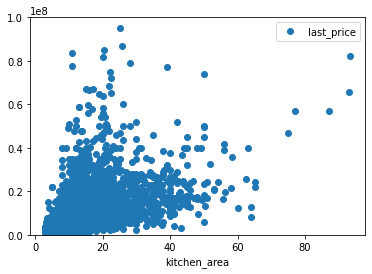

In [85]:
data.plot(y='last_price', x=column_to_test, style='o', ylim=(0, 10**8)) #, ylim=(0,1), grid=True, figsize=(10, 3))

In [86]:
data['area_bin'] = pd.qcut(data[column_to_test],5)

In [87]:
data.groupby('area_bin')['last_price'].agg(['count','median'])

,count,median
area_bin,,
"(2.999, 6.7]",4230,3480000.0
"(6.7, 8.4]",4325,4200000.0
"(8.4, 10.0]",4335,4500000.0
"(10.0, 12.6]",4053,5400000.0
"(12.6, 93.2]",4177,8500000.0


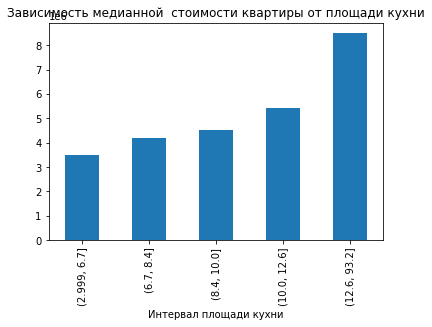

In [88]:
data.groupby('area_bin')['last_price'].median().plot(kind='bar')
plt.xlabel('Интервал площади кухни')
plt.title('Зависимость медианной  стоимости квартиры от площади кухни')
plt.show()

Цена сильно зависит от площади кухни квартиры. На зависимоть указвает и корреляция данных и ярко демонстрируется зависимостью медианной цены при разбиновке площади кухни. Зависимость выражена слабее чем в случае жилой площади квартиры и существенно лабее чем в случае общей площади квартиры. 

##### Зависимость от количества комнат

In [89]:
data[['last_price','rooms']].corr()

,last_price,rooms
last_price,1.000000,0.381381
rooms,0.381381,1.000000


In [90]:
data.groupby('rooms')['last_price'].agg(['count','median'])

,count,median
rooms,,
0,193,2700000.0
1,7990,3600000.0
2,7907,4750000.0
3,5781,6200000.0
4,1138,8900000.0
5,265,12500000.0
6,62,13750000.0
7,20,16750000.0
8,2,19145000.0


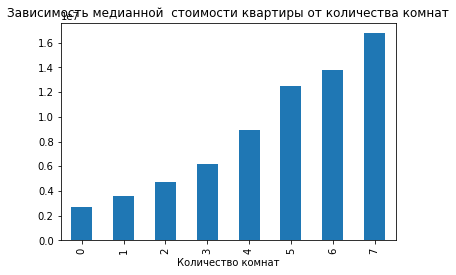

In [91]:
data[data['rooms']<8].groupby('rooms')['last_price'].median().plot(kind='bar',xlim=(0,7))
plt.xlabel('Количество комнат')
plt.title('Зависимость медианной  стоимости квартиры от количества комнат')
plt.show()

Цена сильно зависит от количества комнат квартиры. На зависимоть указывает и корреляция данных и ярко демонстрируется зависимостью медианной цены при разбиновке площади кухни. Зависимость выражена слабее в сравнении с зависимостью от жилой площади, площади квартиры, и общей площади квартиры. 

##### Зависимость от дня недели подачи объявления 

In [92]:
data.groupby('day_of_week')['last_price'].count()

day_of_week
0    3559
1    4134
2    3905
3    4227
4    3950
5    1913
6    1672
Name: last_price, dtype: int64

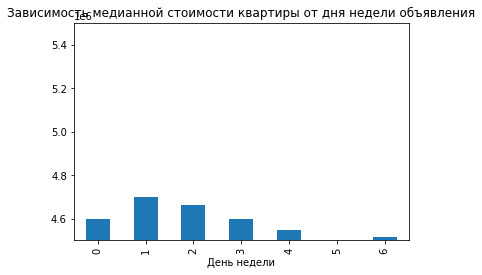

In [93]:
data.groupby('day_of_week')['last_price'].median().plot(kind='bar',ylim=(4.5*10**6,5.5*10**6))
plt.xlabel('День недели')
plt.title('Зависимость медианной стоимости квартиры от дня недели объявления')
plt.show()

Цена продажи немного ниже для объявлений немного ниже на выходных

##### Зависимость цены от месяца подачи объявления 

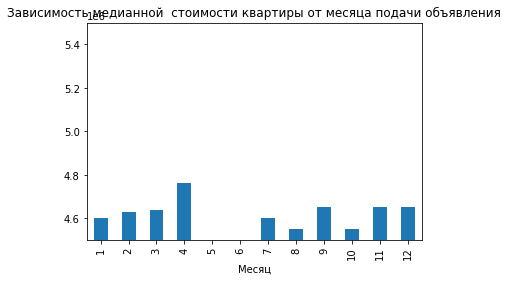

In [94]:
data.groupby('month')['last_price'].median().plot(kind='bar',ylim=(4.5*10**6,5.5*10**6))
plt.xlabel('Месяц')
plt.title('Зависимость медианной  стоимости квартиры от месяца подачи объявления')
plt.show()

Явной зависимости цены от месяца объявления о продаже не выявлено.

##### Зависимость цены от года подачи объявления

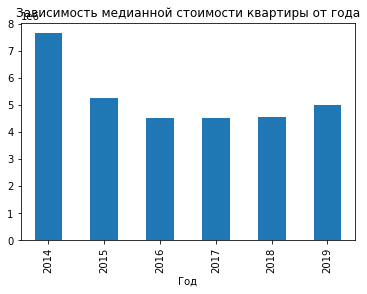

In [95]:
data.groupby('year')['last_price'].median().plot(kind='bar',xlim=(0,7))
plt.xlabel('Год')
plt.title('Зависимость медианной стоимости квартиры от года')
plt.show()

Цена сущесвенно опала после 2014 года. в 2019 году отмечается не большое востановление цен.

##### Зависимость цены от типа этажа

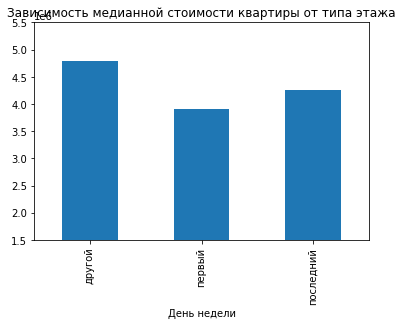

In [96]:
data.groupby('type_of_floor')['last_price'].median().plot(kind='bar',ylim=(1.5*10**6,5.5*10**6))
plt.xlabel('День недели')
plt.title('Зависимость медианной стоимости квартиры от типа этажа')
plt.show()

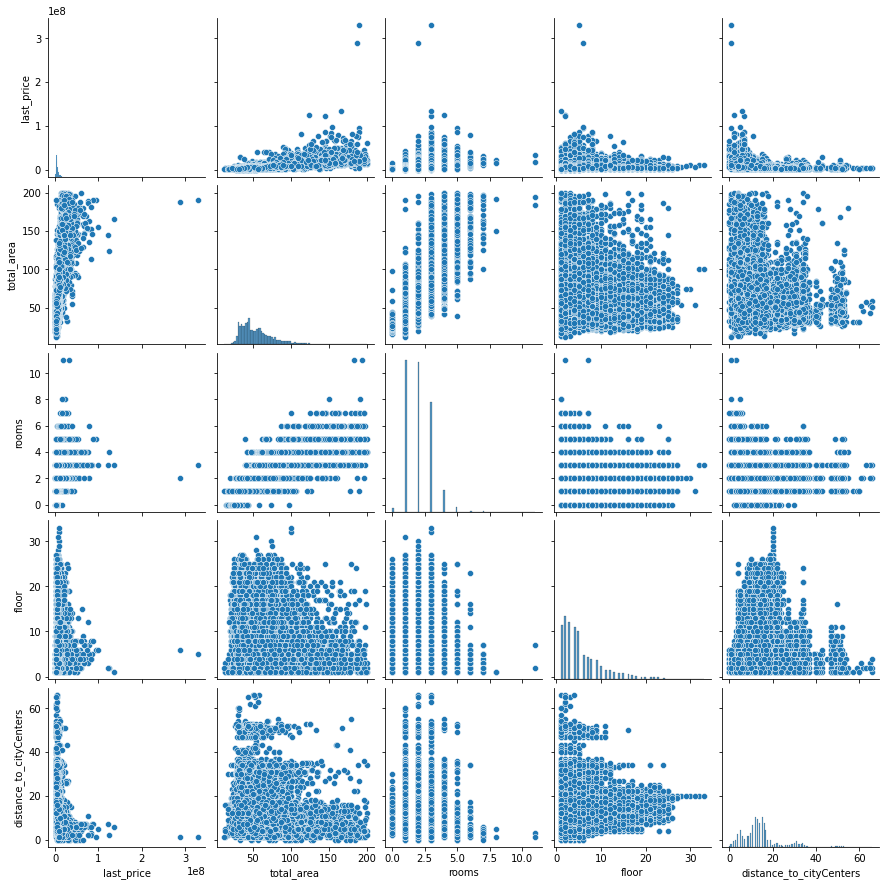

In [97]:
import seaborn as sns
#penguins = sns.load_dataset("penguins")
#penguins
#sns.pairplot(penguins)
sns.pairplot(data[['last_price','total_area','rooms','floor','distance_to_cityCenters']])#,kind='hist')

#### Вычисление средней цены одно кв метра

In [98]:
(data.
     groupby('locality_name')['price'].
     agg(['count','mean']).
     sort_values(by='count',ascending=False).
     head(10).
     sort_values(by='mean',ascending=False)
)

,count,mean
locality_name,,
Санкт-Петербург,15438,113448.424586
Пушкин,363,103077.242205
Кудрово,471,95326.179139
Парголово,325,90291.780571
Мурино,585,85987.443967
Шушары,439,78673.295765
Колпино,336,75389.159045
Гатчина,303,68625.141404
Всеволожск,394,68606.705174


Десять самых дорогих населенных пунктов включают: 'Санкт-Петербург', 'Пушкин', 'Кудрово', 'Парголово', 'Мурино', 'Шушары', 'Колпино', 'Гатчина', 'Всеволожск', 'Выборг'. Самый дешевый из ник Выборг, а самый дорогой Санкт-Петербург. 

#### Стоимость квартир в Санкт-Петербурге по удаленности от города

In [99]:
stat=pd.pivot_table(data.query('locality_name=="Санкт-Петербург"'),
               values='last_price', 
               index='distance_to_cityCenters', aggfunc=['count',np.mean])   

In [100]:
stat

,count,mean
,last_price,last_price
distance_to_cityCenters,,
0,25,2.380505e+07
1,175,1.635016e+07
2,286,1.360541e+07
3,342,1.029621e+07
4,662,1.090355e+07
5,865,1.154876e+07
6,575,1.209272e+07
7,407,1.366048e+07


<AxesSubplot:xlabel='distance_to_cityCenters'>

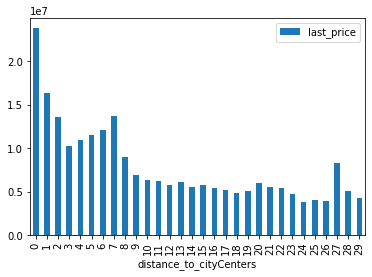

In [101]:
stat['mean'].plot(kind='bar')

Цена квартиры в среднем падает с удалением от цента города. Наиболее дорогие квартиры в центре и в ебольшое кольцо 5-7 км.График после 23 км скорое всего не репрезентативен т.к. представлен малым числом  данных.

### Общий вывод

В этом проекте проанализированны данные о продаже квартир на платформе Яндекс недвижимости
с 2014 по 2019 годы.

На этапе предобработки данных частично заполнены пропуски в данных, также исправлены названия населенных пунктов для избежания дубликатов.

Также бы добавили в таблицу столбцы со следующим содержанием:
- цена квадратного метра
- день недели, месяц и год публикации объявления
- тип этажа квартиры (первый, последний, другое); 
- а также отношение площади кухни к общей площади
- расстояние до центра города в км.

Анализ данных выявил следующее:
* Цена за квадратный метр имеет положительную корреляцию  с общей площадью, жилой площадью и пролощадью кухни (перечесление в порядке убывания корреляции) . Отрицательная корреляция с удаленностью от города. Остальные параметры существенно не влияют на цену. 

Цена квартиры в среднем падает с удалением от цента города. Наиболее дорогие квартиры в пешей доступности от центра и небольшом кольце 5-7 км.

Примерно половина квартир продается в течении 3 месяцев. Быстрой продажей можно считать если квартира была продана быстрее чем за полтора месяца - примерно за столько дней продается четверь всех квартир

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод